<a href="https://colab.research.google.com/github/ashiqur0421/CMSC320_Group_Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 2: Data Pre-Processing, exploration and sample statistics

Importing necessary libaries

In [18]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

**Dataframe creation**

In [19]:
# Importing the latest version of the dataset
path = kagglehub.dataset_download("yasserh/titanic-dataset")
# dataframe
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**DataFrame Info**

In [20]:
print(df.info())
print(df.duplicated())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


**Discussion about datafram**: This dataset contians 891 entries and 12 features. Based on the df.info(), only 'Age' column is missing values.  <br>
There are no duplicate rows as indicated by df.duplicated() being equal to number of entires.

**Significance Level Choice**: For all hypothesis testing, we are choosing a significance level α = 0.05.

---------------------------------------------------------- <br>
---------------------------------------------------------- <br>
---------------------------------------------------------- <br>

In [21]:
def str_to_int(val):
    if val == 'male':
        return 0
    elif val == 'female':
        return 1
    else:
        return None

df['Sex'] = df['Sex'].apply(str_to_int)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(df['Age'].median())

contingency_table = pd.crosstab(df['Pclass'], df['Survived'])
chi2_class, p_class, dof_class, _ = stats.chi2_contingency(contingency_table)
print(contingency_table)
print(f"Chi-square: {chi2_class:.3f}  p-value: {p_class:.6f}")


# Man vs Woman Chi-squared test (Who survives?)
# Survival rate vs pass. class
# Age outliers

df

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119
Chi-square: 102.889  p-value: 0.000000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


From the contigency table, we see that there is a statistically significant relationship between passenger class and survival outcome. Passenger class is correlated with whether a passenger survived the Titanic. First class passengers were much more likely to survive, and this makes logical sense because they had better access to lifeboats and were given priority. The p-value is less than 0.01, meaning we reject the null hypothesis and conclude that passenger class is strongly associated with survival on the Titanic.

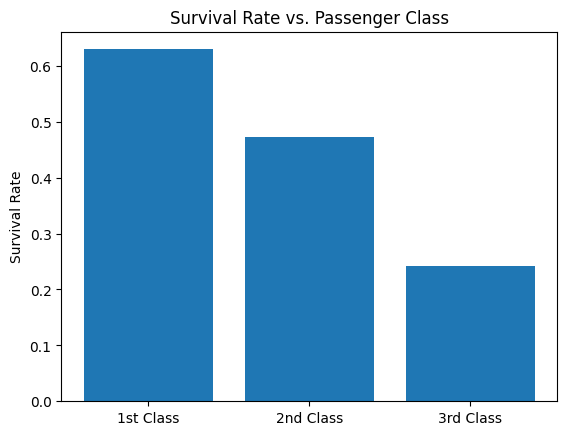

In [22]:
survive_rate_class = contingency_table[1] / contingency_table.sum(axis=1)
x_values = ["1st Class", "2nd Class", "3rd Class"]
survival = survive_rate_class.values
plt.bar(x_values, survival)
plt.title("Survival Rate vs. Passenger Class")
plt.ylabel("Survival Rate")
plt.show()

**Passenger Fair vs Survivibility**

In [23]:
fare_survived = df[df['Survived'] == 1]['Fare']
fare_died = df[df['Survived'] == 0]['Fare']

# displaying summary statistics for both group
print("----- Survived ----- ")
display(fare_survived.describe())
print("\n\n----- Not Survived ----- ")
display(fare_died.describe())

----- Survived ----- 


count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64



----- Not Survived ----- 


count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64

There are only two possible results for survivibility: Survived or Died. So, these two groups are independent regarding themselves. <br>
H0: Both groups have no difference in fair  <br>
HA: Both groups have difference in fair

In [24]:
# unpaired t-test
t_stat, p_value = stats.ttest_ind(fare_survived, fare_died, equal_var=False, alternative = 'two-sided')
print("unpaired_t test ==> p_value:", p_value)

# mann-whitney u test
u, p_value = stats.mannwhitneyu(fare_survived, fare_died, alternative='two-sided')
print("mann-whitney u ==> p value:", p_value)

unpaired_t test ==> p_value: 2.6993323503141236e-11
mann-whitney u ==> p value: 4.553477179250237e-22


Based on the unpaired t-test, the p-value is 2.70e-11 which is way less than the significance level of 0.05. This means, we reject the null hypothesis meaning there was a signifant difference between survived and not-survived people's fare. On other words, fair did have an effect on the survivibility of the passesgeners.

C:\Users\jeplu\AppData\Local\Temp\ipykernel_46228\2357041921.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([fare_survived, fare_died], labels = ['Survived', 'Not Survived'])


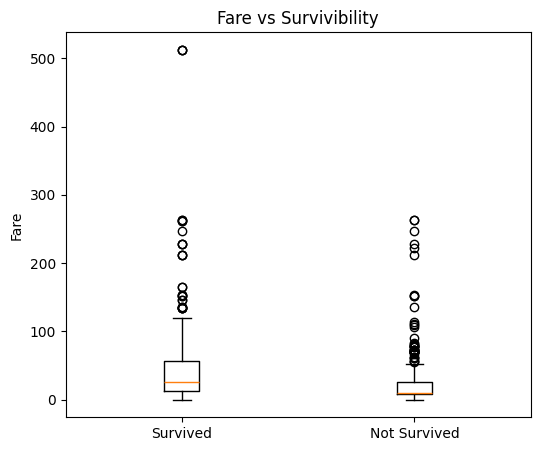

In [25]:
plt.figure(figsize=(6, 5))
plt.boxplot([fare_survived, fare_died], labels = ['Survived', 'Not Survived'])
plt.title("Fare vs Survivibility")
plt.ylabel("Fare")
plt.show()

**Passanger Age vs Survival Rate**

In [28]:
age_survived = df[df["Survived"] == 1]["Age"]
age_not_survived = df[df["Survived"] == 0]["Age"]

# displaying summary statistics for both group
print("----- Survived ----- ")
display(age_survived.describe())
print("\n\n----- Not Survived ----- ")
display(age_not_survived.describe())

----- Survived ----- 


count    342.000000
mean      28.291433
std       13.764425
min        0.420000
25%       21.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64



----- Not Survived ----- 


count    549.000000
mean      30.028233
std       12.499986
min        1.000000
25%       23.000000
50%       28.000000
75%       35.000000
max       74.000000
Name: Age, dtype: float64

H0: There is no meaningful difference between ages of those that survived and those that didn't.

HA: There is a meaningful difference between ages of those that survived and those that didn't.

In [ ]:
# unpaired t-test
t_stat, p_value = stats.ttest_ind(age_survived, age_not_survived, equal_var=False, alternative = 'two-sided')
print("unpaired_t test ==> p_value:", p_value)

# mann-whitney u test
u, p_value = stats.mannwhitneyu(fare_survived, age_not_survived, alternative='two-sided')
print("mann-whitney u ==> p value:", p_value)

unpaired_t test ==> p_value: 0.058309159977757444
mann-whitney u ==> p value: 0.03984874640850986


The Mann-Whitney test gave a p-value of 0.03984874640850986, which is under our significance level of .05. We reject the null hypothesis, suggesting statistically significant differences between the age distributions of survivors vs non-survivors.

However, the t-test had a p-value of 0.058309159977757444, which is over our significance level of .05, meaning we fail to reject the null hypothesis. This suggests that there is no statistical significance between the mean ages of those who survived and those who didn't

So, the averages may be similar, but the distributions of survivors' vs. non-survivors' age is different. We reject the null hypothesis based on the Mann-Whitney U test, but fail to reject it based on the t-test.

C:\Users\jeplu\AppData\Local\Temp\ipykernel_46228\1000708352.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([age_survived, age_not_survived], labels = ['Survived', 'Not Survived'])


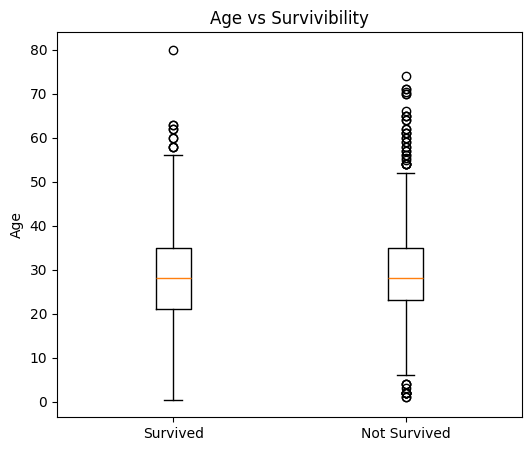

In [32]:
plt.figure(figsize=(6, 5))
plt.boxplot([age_survived, age_not_survived], labels = ['Survived', 'Not Survived'])
plt.title("Age vs Survivibility")
plt.ylabel("Age")
plt.show()